<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [32]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

### Step 1: Import Required Libraries


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [9]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [17]:
## Write your code here
duplicate_rows = df[df.duplicated()]

# Count number of duplicate rows
print("Number of duplicate rows:", len(duplicate_rows))

# Display first few duplicate rows
print(duplicate_rows.head())

Number of duplicate rows: 0
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWo

### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [18]:
subset_cols = [
    'MainBranch', 'Employment', 'RemoteWork',
    'Country', 'OrgSize', 'YearsCodePro',
    'CompTotal', 'ConvertedCompYearly', 'PurchaseInfluence'
]

# Drop duplicates based on this subset
df_unique = df.drop_duplicates(subset=subset_cols)

# Optional: Check the number of rows reduced
print(f"Original: {len(df)}, After deduplication: {len(df_unique)}")

Original: 65437, After deduplication: 50730


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [23]:
missing_counts = df.isnull().sum().sort_values(ascending = False)
print("Missing values per column:\n", missing_counts.head(10))
most_frequent = df['EdLevel'].mode()[0]
df['EdLevel'].fillna(most_frequent, inplace = True)
print("Missing values in 'EdLevel' column after imputation is :", df['EdLevel'].isnull().sum())

Missing values per column:
 AINextMuch less integrated       64289
AINextLess integrated            63082
AINextNo change                  52939
AINextMuch more integrated       51999
EmbeddedAdmired                  48704
EmbeddedWantToWorkWith           47837
EmbeddedHaveWorkedWith           43223
ConvertedCompYearly              42002
AIToolNot interested in Using    41023
AINextMore integrated            41009
dtype: int64
Missing values in 'EdLevel' column after imputation is : 0


/tmp/ipykernel_2353/3449048527.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EdLevel'].fillna(most_frequent, inplace = True)


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [26]:
missing_count = df['ConvertedCompYearly'].isnull().sum() 
print("missing counts in median_value is : ", df['ConvertedCompYearly'].median())
# df['ConvertedCompYearly'].fillna(median_value, inplace=True) is : ", missing count)
median = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'].fillna(median, inplace = True)
print(df['ConvertedCompYearly'].describe())

missing counts in median_value is :  65000.0
count    6.543700e+04
mean     7.257636e+04
std      1.122207e+05
min      1.000000e+00
25%      6.500000e+04
50%      6.500000e+04
75%      6.500000e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


/tmp/ipykernel_2353/2065350499.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(median, inplace = True)


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


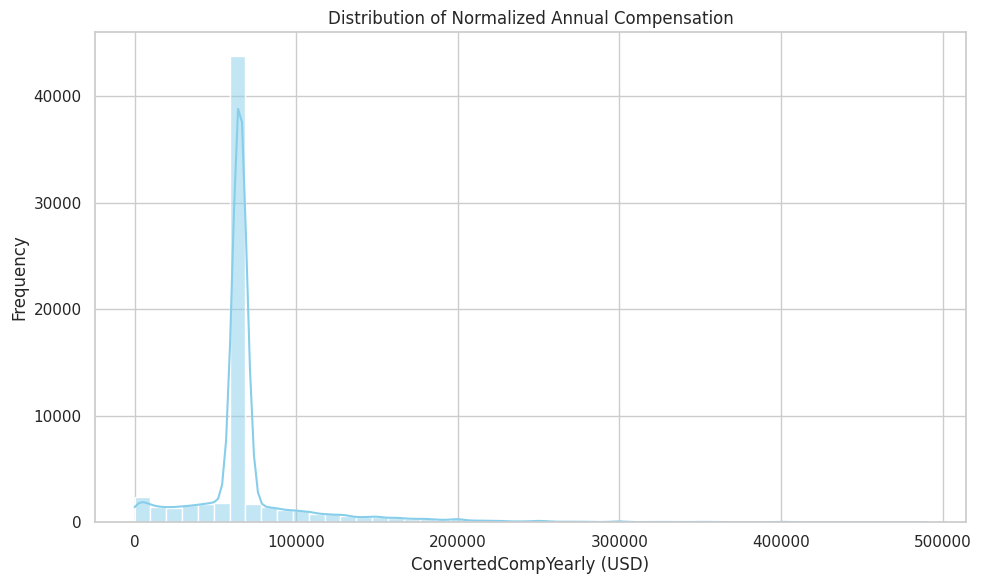

In [34]:
df_filtered = df[df['ConvertedCompYearly'] < 500000]

sns.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['ConvertedCompYearly'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Normalized Annual Compensation')
plt.xlabel('ConvertedCompYearly (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
